In [65]:
Sys.setlocale("LC_ALL", 'Persian')

options(scipen=999)


library(plyr)
library(caret)
library(class)
library(forecast)
library(KernelKnn)
library(kknn)

[1] "LC_COLLATE=Persian_Iran.1256;LC_CTYPE=Persian_Iran.1256;LC_MONETARY=Persian_Iran.1256;LC_NUMERIC=C;LC_TIME=Persian_Iran.1256"

In [66]:
# install.packages('plotmo')

In [76]:
library(rpart)
library(rpart.plot)
library(randomForest)
library(adabag)
library(gbm)
library(plotmo)
library(psych)

Warning message:
"package 'psych' was built under R version 3.6.3"
Attaching package: 'psych'

The following object is masked from 'package:plotrix':

    rescale

The following objects are masked from 'package:ggplot2':

    %+%, alpha

The following object is masked from 'package:randomForest':

    outlier



In [83]:
data = readxl::read_excel(path = 'E:\\Term 7\\Data Mining\\Ex2\\KNN\\Iran_Maskan_koll9904.xlsx')

head(data)

کد قرارداد,نوع قرارداد,استان,شهرستان,نوع ملک,منطقه شهرداری,نوع کاربری,مساحت,درصد,قیمت,قیمت یک مترمربع,عمر بنا,نوع اسکلت,تاریخ ثبت قرارداد,شش رقم نخست کد پستی
19136381,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,83.00,100,3000000,36144.58,15,فلزي,1399/04/14,456179
19140513,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,90.00,100,1080000,12000.00,9,فلزي,1399/04/15,456615
19192568,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,49.00,100,10000000,204081.63,10,بتوني,1399/04/23,456173
19202902,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.92,100,3240000,40039.55,9,فلزي,1399/04/24,456194
19203171,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.00,100,750000,9375.00,10,بتوني,1399/04/24,456618
19052240,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,100.00,100,5500000,55000.00,0,بتوني,1399/04/01,381333


In [84]:
str(data)

tibble [43,133 x 15] (S3: tbl_df/tbl/data.frame)
 $ کد قرارداد         : chr [1:43133] "19136381" "19140513" "19192568" "19202902" ...
 $ نوع قرارداد        : chr [1:43133] "مبايعه نامه" "مبايعه نامه" "مبايعه نامه" "مبايعه نامه" ...
 $ استان              : chr [1:43133] "زنجان" "زنجان" "زنجان" "زنجان" ...
 $ شهرستان            : chr [1:43133] "ابهر" "ابهر" "ابهر" "ابهر" ...
 $ نوع ملک            : chr [1:43133] "دستگاه آپارتمان" "دستگاه آپارتمان" "دستگاه آپارتمان" "دستگاه آپارتمان" ...
 $ منطقه شهرداري      : num [1:43133] NA NA NA NA NA NA NA NA NA 4 ...
 $ نوع کاربري         : chr [1:43133] "مسکوني" "مسکوني" "مسکوني" "مسکوني" ...
 $ مساحت              : num [1:43133] 83 90 49 80.9 80 ...
 $ درصد               : chr [1:43133] "100" "100" "100" "100" ...
 $ قيمت               : num [1:43133] 3000000 1080000 10000000 3240000 750000 ...
 $ قيمت يک مترمربع    : chr [1:43133] "36144.58" "12000.00" "204081.63" "40039.55" ...
 $ عمر بنا            : num [1:43133] 15 9 10 9 10 0 1 6 19 0 ...


In [85]:
names(data)[1] = 'contrat_number'
names(data)[2] = 'contract_type'
names(data)[3] = 'state'
names(data)[4] = 'city'
names(data)[5] = 'property_type'
names(data)[6] = 'district_number'
names(data)[7] = 'usage_type'
names(data)[8] = 'area'
names(data)[9] = 'percentage'
names(data)[10] = 'price'
names(data)[11] = 'price_per_square'
names(data)[12] = 'building_age'
names(data)[13] = 'skeleton_type'
names(data)[14] = 'contract_date'
names(data)[15] = 'postal_code'
data = data[!is.na(data$contrat_number),]
data$percentage = as.numeric(data$percentage)
data$price = ((as.numeric(data$price) / 10000) * data$percentage) / 100
data$price_per_square = as.numeric(data$price_per_square) / 10000


In [86]:
khoozestan = data[data$state == 'خوزستان',]

head(khoozestan)

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
19048971,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,NA,مسکوني,75.00,100,195,2.600000,2,بدون اسکلت,1399/04/01,617563
19052727,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,2,مسکوني,96.30,100,735,7.632399,13,فلزي,1399/04/01,191181
19056655,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,8,مسکوني,111.60,100,585,5.241935,8,بتوني,1399/04/02,618493
19060434,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,4,مسکوني,13313.00,100,400,0.030046,11,فلزي,1399/04/02,613668
19061836,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,5,مسکوني,80.48,100,285,3.541252,11,بتوني و فلزي,1399/04/02,613495
19061854,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,3,مسکوني,72.22,100,500,6.923290,9,بتوني و فلزي,1399/04/02,617763


In [87]:
summary(khoozestan)

 contrat_number     contract_type         state               city          
 Length:768         Length:768         Length:768         Length:768        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 property_type      district_number   usage_type             area         
 Length:768         Min.   : 1.000   Length:768         Min.   :    1.00  
 Class :character   1st Qu.: 2.000   Class :character   1st Qu.:   76.15  
 Mode  :character   Median : 2.000   Mode  :character   Median :   90.00  
                    Mean   : 2.492                      Mean   :  323.55  
         

#### 1:contrat_number:no_use
#### 2:contract_type:all_same
#### 3:state:all_same
#### 5:property_type:all_same
#### 6:district_number:522 NA out of 768 records
#### 7:usage_type:all_same
#### 9:percentage:multiplied_in_price
#### 11:price_per_square:should not be used in prediction
#### 14:contract_date:no_use

In [88]:
khoozestan = khoozestan[-c(1,2,3,5,6,7,9,11,14)]

head(khoozestan)

city,area,price,building_age,skeleton_type,postal_code
اهواز,75.00,195,2,بدون اسکلت,617563
اهواز,96.30,735,13,فلزي,191181
اهواز,111.60,585,8,بتوني,618493
اهواز,13313.00,400,11,فلزي,613668
اهواز,80.48,285,11,بتوني و فلزي,613495
اهواز,72.22,500,9,بتوني و فلزي,617763


In [89]:
city before mapping

[1] "اهواز"           "ايذه"            "آبادان"          "بندر امام خميني"
 [5] "بندر ماهشهر"     "بهبهان"          "چمران"           "خرمشهر"         
 [9] "دزفول"           "رامشير"          "شوش"             "شوشتر"          
[13] "شيبان"           "مسجد سليمان"     "هنديجان"

In [92]:
city after mapping

[1] "ahvaz"                 "izeh"                  "abadan"               
 [4] "bandare_emam_khomeini" "bandare_mahshahr"      "behbahan"             
 [7] "chamran"               "khorramshahr"          "dezfool"              
[10] "raamshir"              "shoosh"                "shooshtar"            
[13] "shiban"                "masjed_soleiman"       "handijan"

In [90]:
skeleton_type before mapping

[1] "بدون اسکلت"         "فلزي"               "بتوني"             
[4] "بتوني و فلزي"       "آجر يا بلوک سيماني" "خشتي يا گلي"

In [93]:
skeleton_type after mapping

[1] "none"                  "metal"                 "concrete"             
[4] "metal_concrete"        "brick_or_cement_block" "adobe_or_clay"

In [91]:
khoozestan$city = mapvalues(khoozestan$city, 
          from=c('اهواز','ايذه','آبادان',unique(khoozestan$city)[4],'بندر ماهشهر','بهبهان','چمران','خرمشهر','دزفول','رامشير','شوش','شوشتر','شيبان','مسجد سليمان','هنديجان'), 
          to=c('ahvaz','izeh','abadan','bandare_emam_khomeini','bandare_mahshahr','behbahan','chamran',
               'khorramshahr','dezfool','raamshir','shoosh','shooshtar','shiban','masjed_soleiman','handijan'))

khoozestan$skeleton_type = mapvalues(khoozestan$skeleton_type, 
          from=c(unique(khoozestan$skeleton_type)[1],unique(khoozestan$skeleton_type)[2],unique(khoozestan$skeleton_type)[3],unique(khoozestan$skeleton_type)[4],unique(khoozestan$skeleton_type)[5],unique(khoozestan$skeleton_type)[6]), 
          to=c('none','metal','concrete','metal_concrete','brick_or_cement_block','adobe_or_clay'))

head(khoozestan)

city,area,price,building_age,skeleton_type,postal_code
ahvaz,75.00,195,2,none,617563
ahvaz,96.30,735,13,metal,191181
ahvaz,111.60,585,8,concrete,618493
ahvaz,13313.00,400,11,metal,613668
ahvaz,80.48,285,11,metal_concrete,613495
ahvaz,72.22,500,9,metal_concrete,617763


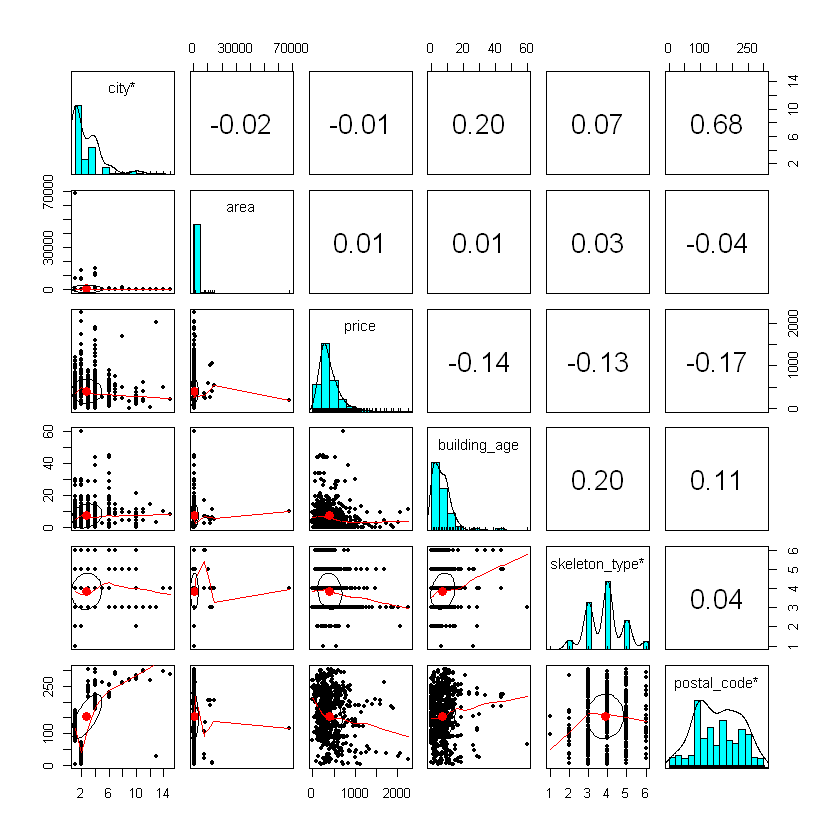

In [82]:
pairs.panels(khoozestan)

In [20]:
dim(khoozestan)

[1] 768   6

In [21]:
dummy_khoozestan = data.frame(predict(dummyVars(~.,khoozestan),khoozestan))

In [22]:
# names(dummy_khoozestan)
str(dummy_khoozestan)

'data.frame':	768 obs. of  327 variables:
 $ cityabadan                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityahvaz                         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ citybandare_emam_khomeini         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citybandare_mahshahr              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citybehbahan                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citychamran                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citydezfool                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityhandijan                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityizeh                          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citykhorramshahr                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citymasjed_soleiman               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityraamshir                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityshiban                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityshoosh                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cit

In [23]:
X = dummy_khoozestan[-c(17)]
Y = dummy_khoozestan['price']

In [24]:
set.seed(313)

train_index = sample.int(nrow(dummy_khoozestan),0.8*nrow(dummy_khoozestan),replace=F)

x_train = X[train_index,]
y_train = Y[train_index,]
train = cbind(x_train,y_train)

x_test = X[-train_index,]
y_test = Y[-train_index,]
test = cbind(x_test,y_test)

In [25]:
reg.tree = rpart(formula = y_train~. , data = train, method = "anova")

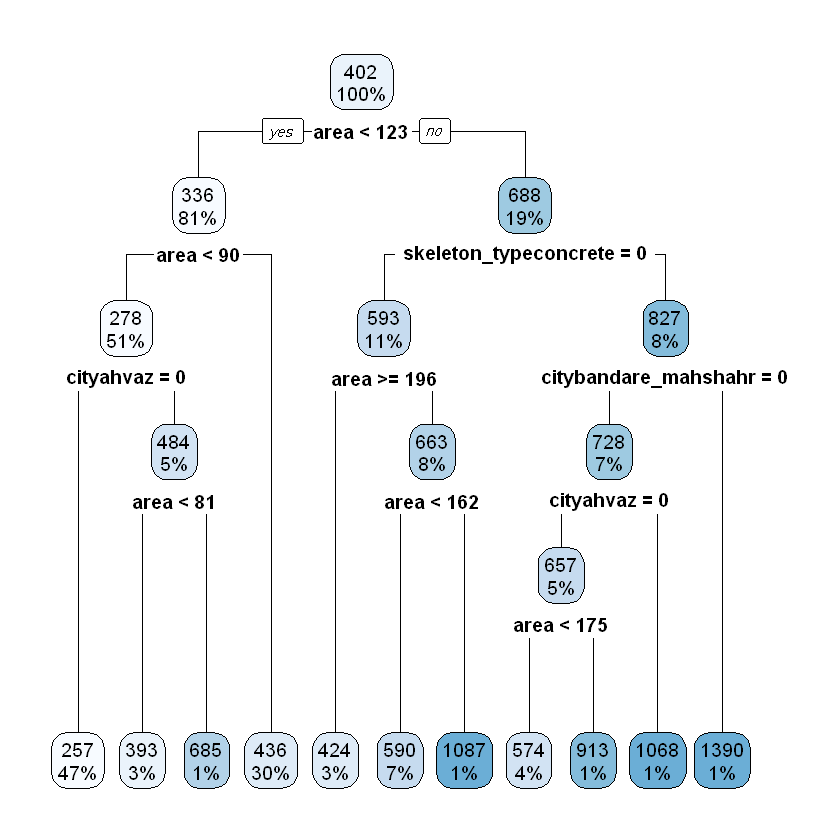

In [32]:
rpart.plot(reg.tree,split.font=2)

In [33]:
rpart.rules(reg.tree,cover = TRUE)

,y_train,,,,,,,,,,,,,,,,,,,cover
8,257,when,area,<,90,,,,,,,&,cityahvaz,is,0,,,,,47%
18,393,when,area,<,81,,,,,,,&,cityahvaz,is,1,,,,,3%
12,424,when,area,>=,,,196,&,skeleton_typeconcrete,is,0,,,,,,,,,3%
5,436,when,area,is,90,to,123,,,,,,,,,,,,,30%
56,574,when,area,is,123,to,175,&,skeleton_typeconcrete,is,1,&,cityahvaz,is,0,&,citybandare_mahshahr,is,0,4%
26,590,when,area,is,123,to,162,&,skeleton_typeconcrete,is,0,,,,,,,,,7%
19,685,when,area,is,81,to,90,,,,,&,cityahvaz,is,1,,,,,1%
57,913,when,area,>=,,,175,&,skeleton_typeconcrete,is,1,&,cityahvaz,is,0,&,citybandare_mahshahr,is,0,1%
29,1068,when,area,>=,,,123,&,skeleton_typeconcrete,is,1,&,cityahvaz,is,1,&,citybandare_mahshahr,is,0,1%
27,1087,when,area,is,162,to,196,&,skeleton_typeconcrete,is,0,,,,,,,,,1%


In [34]:
printcp(reg.tree)


Regression tree:
rpart(formula = y_train ~ ., data = train, method = "anova")

Variables actually used in tree construction:
[1] area                  cityahvaz             citybandare_mahshahr 
[4] skeleton_typeconcrete

Root node error: 48176757/614 = 78464

n= 614 

        CP nsplit rel error  xerror    xstd
1 0.240793      0   1.00000 1.00212 0.13482
2 0.059848      1   0.75921 0.79260 0.10959
3 0.042885      2   0.69936 0.75628 0.11283
4 0.027999      4   0.61359 0.76714 0.11953
5 0.023601      5   0.58559 0.73207 0.11632
6 0.020250      7   0.53839 0.74994 0.11813
7 0.014443      8   0.51814 0.76885 0.12128
8 0.010966      9   0.50369 0.76973 0.11407
9 0.010000     10   0.49273 0.77080 0.11427


In [35]:
accuracy(predict(reg.tree,x_train),y_train)

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.00000000000004001206,196.6246,133.6232,-5960.619,5981.634


In [36]:
accuracy(predict(reg.tree,x_test),y_test)

,ME,RMSE,MAE,MPE,MAPE
Test set,45.25621,257.2425,159.983,-1699.248,1729.426


In [37]:
deep.reg.tree = rpart(formula = y_train~. , data = train, method = "anova", cp=0)

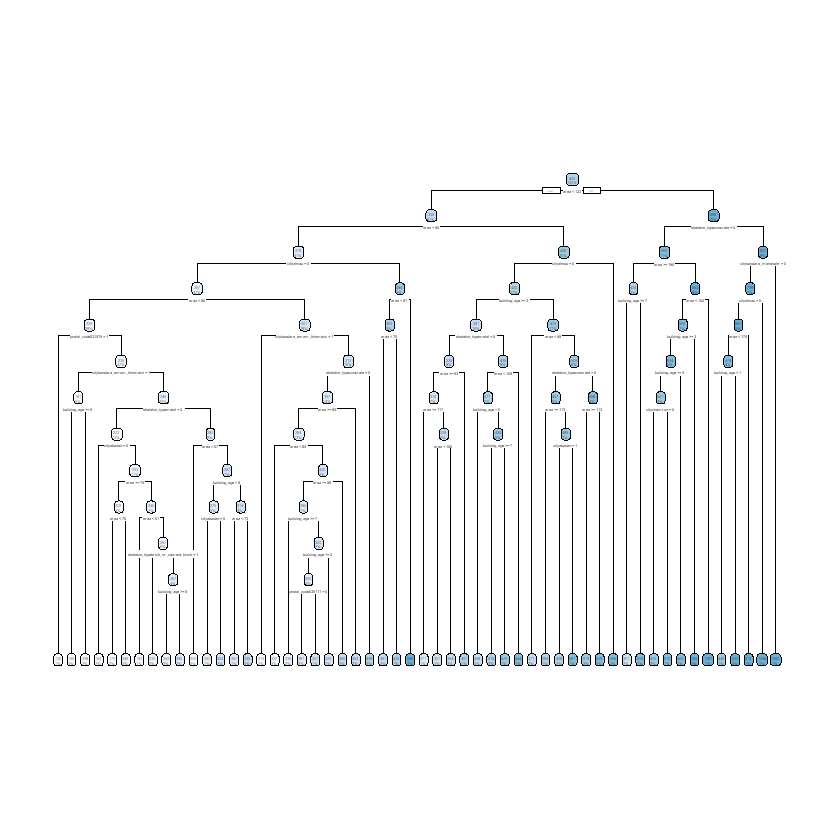

In [38]:
rpart.plot(deep.reg.tree,split.font=2)

In [50]:
rpart.rules(deep.reg.tree,cover = TRUE)

,y_train,,.1,.2,.3,.4,.5,.6,.7,.8,...,,.1,.2,.3,.4,.5,.6,.7,.8,cover
32,130,when,area,<,80,,,&,cityahvaz,is,...,,,,,,,,,,1%
132,155,when,area,<,80,,,&,cityahvaz,is,...,,,,,,,,,,3%
268,169,when,area,<,80,,,&,cityahvaz,is,...,,,,,,,,,,2%
1076,172,when,area,is,75,to,76,&,cityahvaz,is,...,,,,,,,,,,2%
1078,192,when,area,<,61,,,&,cityahvaz,is,...,,,,,,,,,,1%
270,209,when,area,<,67,,,&,cityahvaz,is,...,,,,,,,,,,2%
34,212,when,area,is,80,to,90,&,cityahvaz,is,...,,,,,,,,,,2%
280,222,when,area,is,85,to,85,&,cityahvaz,is,...,,,,,,,,,,3%
133,228,when,area,<,80,,,&,cityahvaz,is,...,,,,,,,,,,2%
2158,232,when,area,is,61,to,75,&,cityahvaz,is,...,1,,,,,,,,,2%


In [39]:
accuracy(predict(deep.reg.tree,x_train),y_train)

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.000000000000002256542,176.3462,113.7177,-4872.698,4891.876


In [40]:
accuracy(predict(deep.reg.tree,x_test),y_test)

,ME,RMSE,MAE,MPE,MAPE
Test set,42.81598,259.4333,151.7825,-1755.838,1785.949


In [41]:
printcp(deep.reg.tree)


Regression tree:
rpart(formula = y_train ~ ., data = train, method = "anova", 
    cp = 0)

Variables actually used in tree construction:
 [1] area                               building_age                      
 [3] cityabadan                         cityahvaz                         
 [5] citybandare_emam_khomeini          citybandare_mahshahr              
 [7] citychamran                        postal_code631579                 
 [9] postal_code635111                  skeleton_typebrick_or_cement_block
[11] skeleton_typeconcrete              skeleton_typemetal                

Root node error: 48176757/614 = 78464

n= 614 

            CP nsplit rel error  xerror    xstd
1  0.240793018      0   1.00000 1.00425 0.13557
2  0.059847642      1   0.75921 0.78844 0.11014
3  0.042885368      2   0.69936 0.73839 0.11272
4  0.027998852      4   0.61359 0.75817 0.11512
5  0.023601447      5   0.58559 0.74939 0.11563
6  0.020250407      7   0.53839 0.75634 0.11575
7  0.014443176      8   0.

In [42]:
pruned.deep.reg.tree = prune(deep.reg.tree,cp=deep.reg.tree$cptable[which.min(deep.reg.tree$cptable[,'xerror']),'CP'])

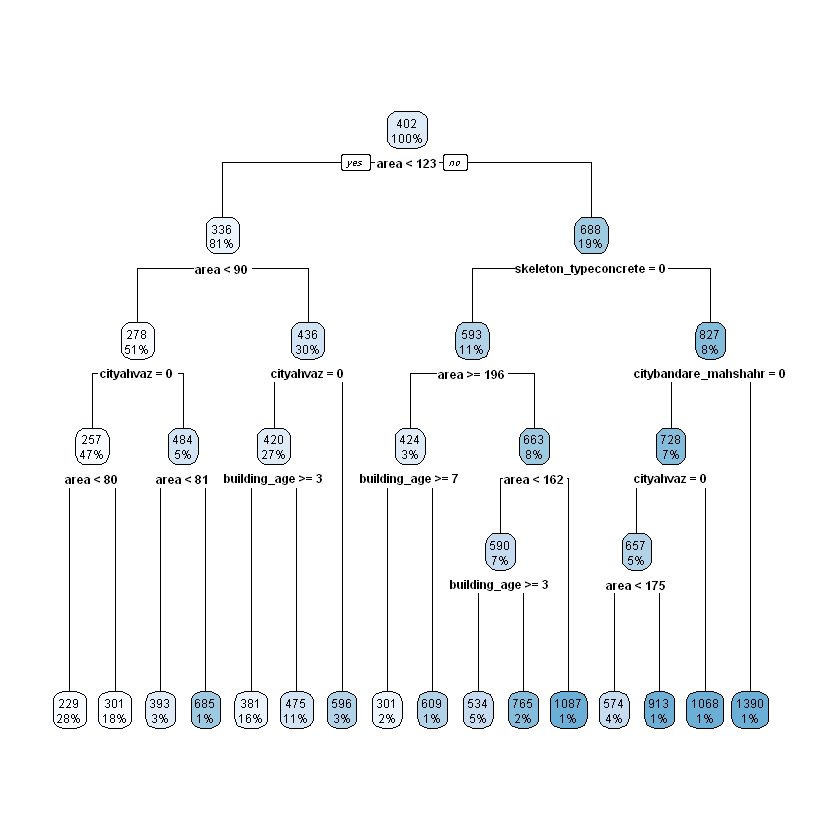

In [43]:
rpart.plot(pruned.deep.reg.tree,split.font=2)

In [52]:
rpart.rules(pruned.deep.reg.tree,cover = TRUE)

,y_train,,.1,.2,.3,.4,.5,.6,.7,.8,...,,.1,.2,.3,.4,.5,.6,.7,.8,cover
16,229,when,area,<,80,,,&,cityahvaz,is,...,,,,,,,,,,28%
17,301,when,area,is,80,to,90,&,cityahvaz,is,...,,,,,,,,,,18%
24,301,when,area,>=,,,196,,,,...,0,&,building_age,>=,7,,,,,2%
20,381,when,area,is,90,to,123,&,cityahvaz,is,...,,&,building_age,>=,3,,,,,16%
18,393,when,area,<,81,,,&,cityahvaz,is,...,,,,,,,,,,3%
21,475,when,area,is,90,to,123,&,cityahvaz,is,...,,&,building_age,<,3,,,,,11%
52,534,when,area,is,123,to,162,,,,...,0,&,building_age,>=,3,,,,,5%
56,574,when,area,is,123,to,175,&,cityahvaz,is,...,1,,,,,&,citybandare_mahshahr,is,0,4%
11,596,when,area,is,90,to,123,&,cityahvaz,is,...,,,,,,,,,,3%
25,609,when,area,>=,,,196,,,,...,0,&,building_age,<,7,,,,,1%


In [44]:
accuracy(predict(pruned.deep.reg.tree,x_train),y_train)

,ME,RMSE,MAE,MPE,MAPE
Test set,0.000000000000000792294,187.9625,126.7318,-6084.495,6105.274


In [45]:
accuracy(predict(pruned.deep.reg.tree,x_test),y_test)

,ME,RMSE,MAE,MPE,MAPE
Test set,35.27346,252.3743,153.564,-1519.289,1547.558


In [46]:
best.pruned.deep.reg.tree = prune(deep.reg.tree,cp=0.059847642)

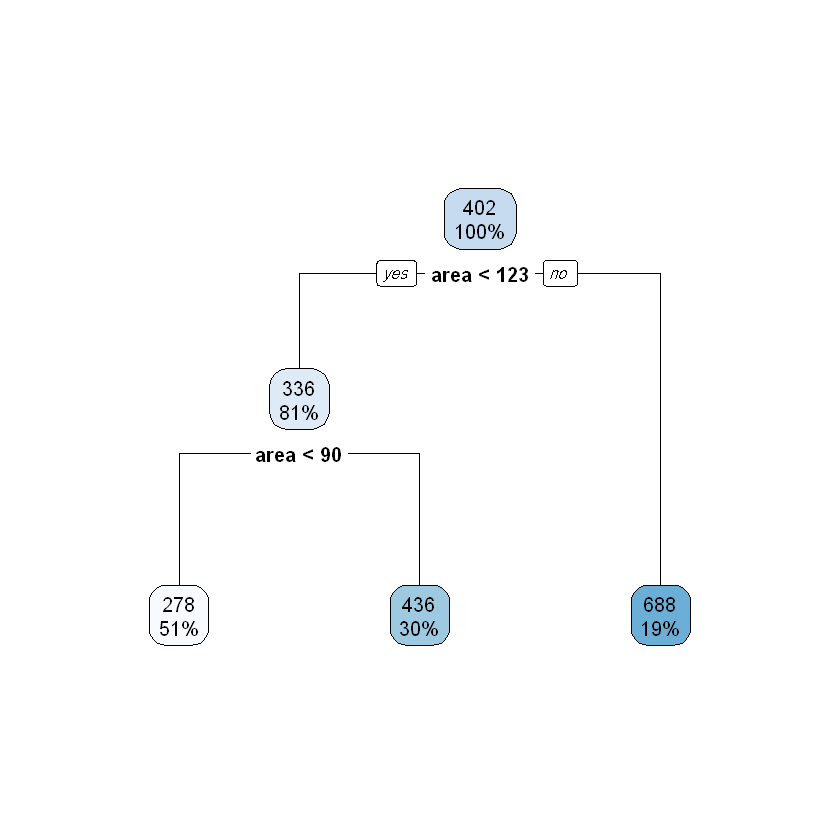

In [47]:
rpart.plot(best.pruned.deep.reg.tree,split.font=2)

In [53]:
rpart.rules(best.pruned.deep.reg.tree,cover = TRUE)

,y_train,,,,,,,cover
4,278,when,area,<,90,,,51%
5,436,when,area,is,90,to,123,30%
3,688,when,area,>=,,,123,19%


In [48]:
accuracy(predict(best.pruned.deep.reg.tree,x_train),y_train)

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.000000000000001883166,234.2528,152.3075,-6204.969,6226.402


In [49]:
accuracy(predict(best.pruned.deep.reg.tree,x_test),y_test)

,ME,RMSE,MAE,MPE,MAPE
Test set,49.27933,270.3546,167.2234,-1842.7,1872.237


In [57]:
set.seed(101)

In [58]:
random.forest = randomForest(x=x_train, y=y_train, ntree=100, importance=T, nodesize=4)

In [59]:
summary(random.forest)

                Length Class  Mode     
call              6    -none- call     
type              1    -none- character
predicted       614    -none- numeric  
mse             100    -none- numeric  
rsq             100    -none- numeric  
oob.times       614    -none- numeric  
importance      652    -none- numeric  
importanceSD    326    -none- numeric  
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               614    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     

In [60]:
accuracy(predict(random.forest,x_train),y_train)

,ME,RMSE,MAE,MPE,MAPE
Test set,5.204199,86.16244,55.99443,-2299.6,2308.987


In [61]:
accuracy(predict(random.forest,x_test),y_test)

,ME,RMSE,MAE,MPE,MAPE
Test set,44.75623,250.0397,148.2198,-1708.236,1735.545


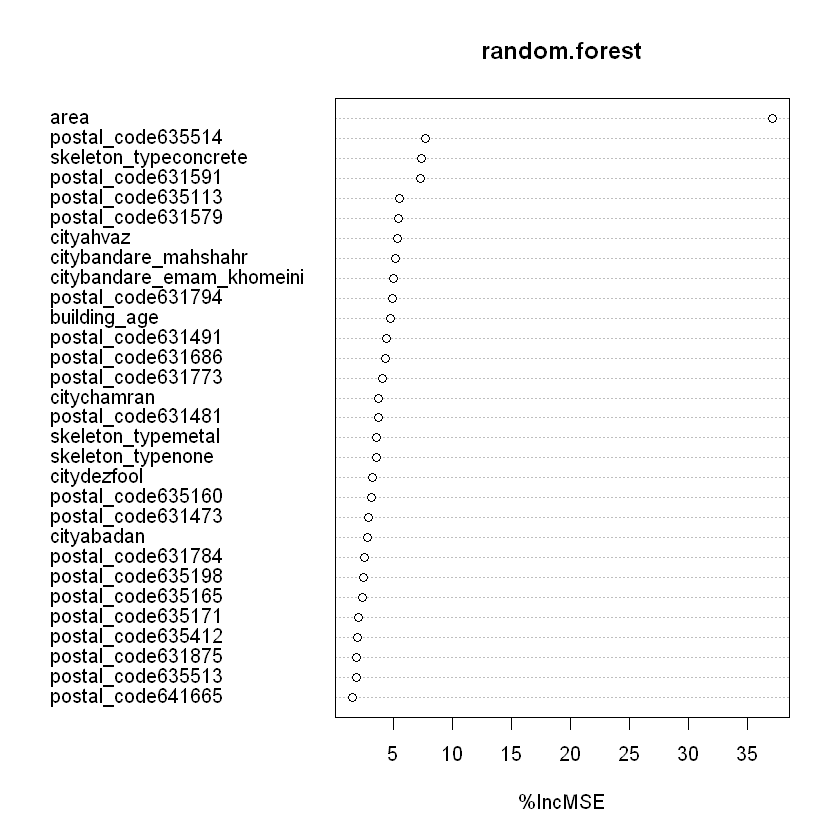

In [62]:
varImpPlot(random.forest,type=1)

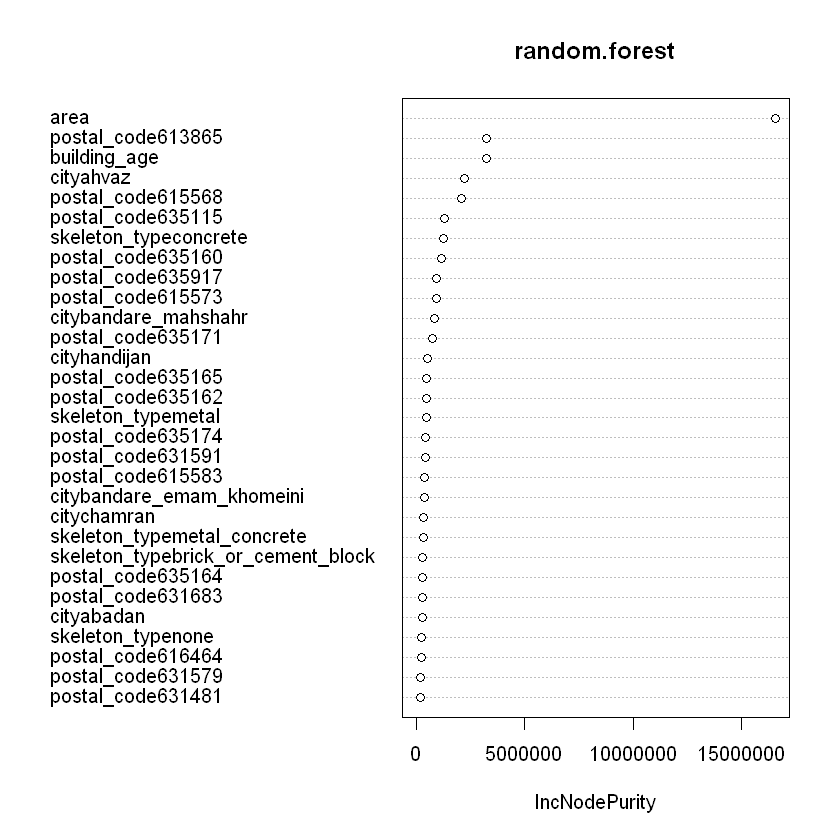

In [63]:
varImpPlot(random.forest,type=2)

 plotmo grid:    cityabadan cityahvaz citybandare_emam_khomeini
                          0         0                         0
 citybandare_mahshahr citybehbahan citychamran citydezfool cityhandijan
                    0            0           0           0            0
 cityizeh citykhorramshahr citymasjed_soleiman cityraamshir cityshiban
        0                0                   0            0          0
 cityshoosh cityshooshtar area building_age skeleton_typeadobe_or_clay
          0             0   90          5.5                          0
 skeleton_typebrick_or_cement_block skeleton_typeconcrete skeleton_typemetal
                                  0                     0                  0
 skeleton_typemetal_concrete skeleton_typenone postal_code181757
                           0                 0                 0
 postal_code191181 postal_code613373 postal_code613388 postal_code613493
                 0                 0                 0                 0
 postal_code61

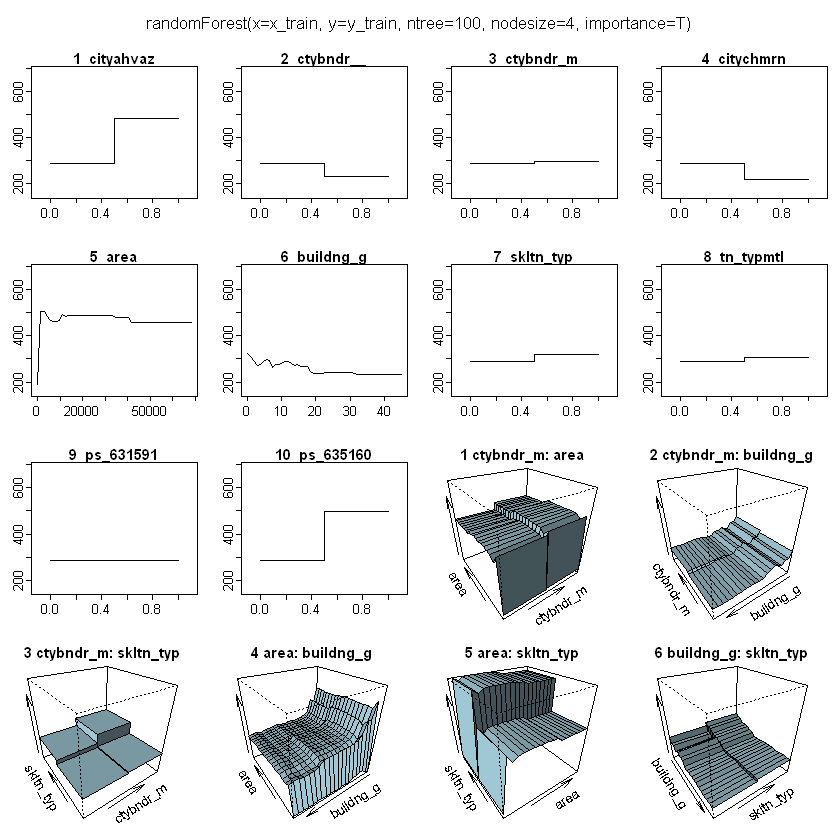

In [64]:
plotmo(random.forest)

In [ ]:
# ,mfinal=10,control = (minsplit = 1)

In [98]:
# train$y_train = as.factor(train$y_train)

In [53]:
set.seed(101)
boosted.tree = gbm(y_train~. , data=train, cv.folds = 10)

Distribution not specified, assuming gaussian ...


Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 13: cityshiban has no variation."Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 26: postal_code613373 has no variation."Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 28: postal_code613493 has no variation."Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 32: postal_code613669 has no variation."Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 38: postal_code613783 has no variation."Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 39: postal_code613858 has no variation."Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 52: postal_code614818 has no variation."Warning message in gbm.fit(x = x, 

In [54]:
boosted.tree

gbm(formula = y_train ~ ., data = train, cv.folds = 10)
A gradient boosted model with gaussian loss function.
100 iterations were performed.
The best cross-validation iteration was 100.
There were 326 predictors of which 9 had non-zero influence.

,var,rel.inf
area,area,72.9519090
cityahvaz,cityahvaz,13.1132179
skeleton_typeconcrete,skeleton_typeconcrete,5.2239214
building_age,building_age,4.2112154
citybandare_mahshahr,citybandare_mahshahr,2.5276543
citychamran,citychamran,1.2785502
cityabadan,cityabadan,0.2850227
citybandare_emam_khomeini,citybandare_emam_khomeini,0.2734410
skeleton_typenone,skeleton_typenone,0.1350681
citybehbahan,citybehbahan,0.0000000


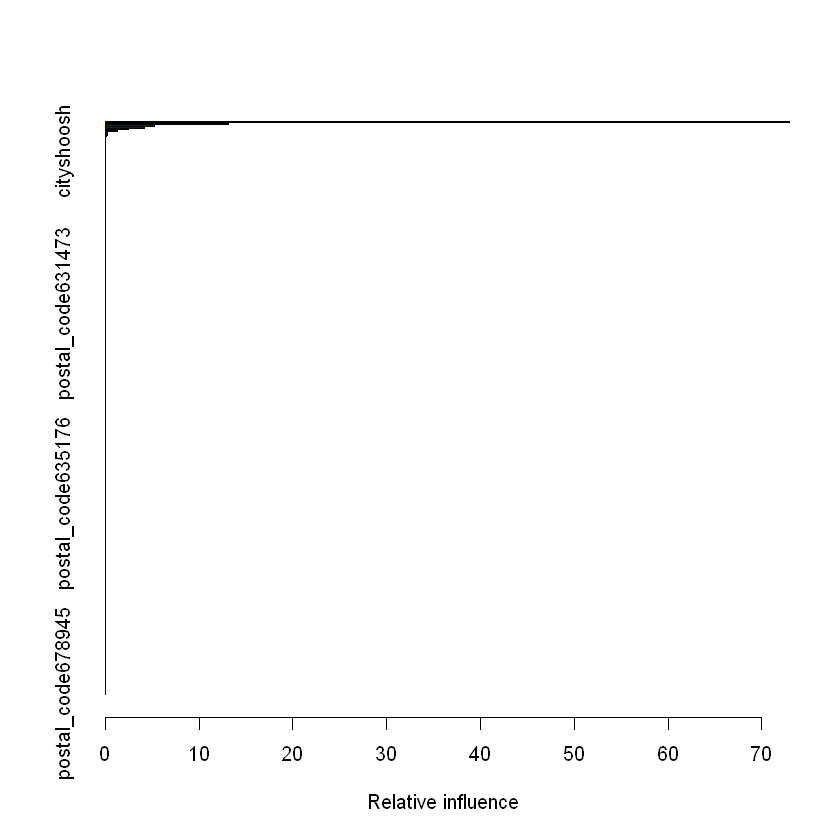

In [55]:
summary(boosted.tree)

In [56]:
accuracy(predict(boosted.tree,x_train),y_train)

Using 100 trees...



,ME,RMSE,MAE,MPE,MAPE
Test set,2.448334,205.4627,134.6677,-6076.502,6097.818


In [57]:
accuracy(predict(boosted.tree,x_test),y_test)

Using 100 trees...



,ME,RMSE,MAE,MPE,MAPE
Test set,39.19129,244.9458,148.4321,-1824.321,1850.706


In [ ]:
train = train[,c(2,16,17,20)]
test = test[,c(2,16,17,20)]

In [ ]:
nn = neuralnet(formula = y_train ~ ., data = train.pca, hidden = c(6), threshold = 1,
  stepmax = 1e+09 ,algorithm = "rprop+",err.fct = "sse", learningrate.factor = list(minus = .5 ,plus = 1.5),
  act.fct = "logistic", linear.output = TRUE, lifesign = 'full', lifesign.step=100)

In [55]:
test[,c(2,16,17,20)]

,cityahvaz,area,building_age,skeleton_typeconcrete
1,1,75.00,2,0
7,1,88.55,3,0
9,1,119.19,2,1
17,1,63.11,15,0
20,1,103.06,60,1
23,1,74.53,4,1
25,1,79.94,8,1
26,1,96.76,19,1
34,1,102.50,6,1
35,1,140.99,4,1


In [58]:
# train$y_train = as.numeric(train$y_train)

In [59]:
# boosted.tree = blackboost(y_train ~. , data = train,tree_controls = partykit::ctree_control(
#                                                                                                teststat = "quad",
#                                                                                                testtype = "Teststatistic",
#                                                                                                mincriterion = 0,
#                                                                                                minsplit = 10, 
#                                                                                                minbucket = 4,
#                                                                                                maxdepth = 6, 
#                                                                                                saveinfo = FALSE))

In [60]:
# boosted.tree

In [61]:
# accuracy(as.numeric(predict(boosted.tree,x_train)[,1]),y_train)

In [62]:
# accuracy(as.numeric(predict(boosted.tree,x_test)[,1]),y_test)

In [107]:
#brt package